In [17]:
from google.colab import drive
import sys
drive.mount('/content/gdrive')
gdrive_path = '/content/gdrive/MyDrive/AIM/'
sys.path.append(gdrive_path)
!ls -l /content/gdrive/MyDrive/AIM/*.py

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
-rw------- 1 root root  3394 Jun  4 21:44 /content/gdrive/MyDrive/AIM/aim_overlayer.py
-rw------- 1 root root  8829 Jun  5 21:15 /content/gdrive/MyDrive/AIM/aim_rater.py
-rw------- 1 root root 10332 Jun  7 20:40 /content/gdrive/MyDrive/AIM/aim_scanner.py
-rw------- 1 root root  2575 Jun  6 21:13 /content/gdrive/MyDrive/AIM/aim_tuner.py
-rw------- 1 root root  7109 Jun  3 14:17 /content/gdrive/MyDrive/AIM/aim_util.py
-rw------- 1 root root 12888 Jun  7 19:23 /content/gdrive/MyDrive/AIM/aim_xformer.py


In [2]:
#!cat /content/gdrive/MyDrive/AIM/aim_tuner.py

In [18]:
import aim_util
import aim_tuner
import aim_xformer
!pip install keras_ocr
import aim_scanner
!pip install fuzzywuzzy
import aim_rater
import aim_overlayer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.8 MB/s eta 0:00:00


In [5]:
!pip install icecream
from icecream import ic

In [6]:
# import aim_tuner.tuner as tuner
#ic(aim_tuner.tuner)
#print(aim_tuner.tuner)

In [7]:
from enum import Enum

class xform_nickname(Enum):
    XFORM0 = "Source"
    XFORM1 = "GrayScale"
    XFORM2 = "Threshold"
    XFORM3 = "Noise"
    XFORM4 = "Sharpen"
    XFORM5 = "Contrast"

In [19]:
source_image_path = '/content/gdrive/MyDrive/AIM/deed_1887_source_orient1.jpg'
source_base = 'deed_1887_'
xform_prefix_list = ['xform0', 'xform1', 'xform2', 'xform3', 'xform4', 'xform5']

grayscale_intensity_C = 1.3
noise_kernel_size_A = 3

In [9]:
!ls -l /content/gdrive/MyDrive/AIM/*.jpg

-rw------- 1 root root 3663644 Jun  7 15:19 /content/gdrive/MyDrive/AIM/citizen_1864_rescan.jpg
-rw------- 1 root root 3890679 Jun  7 19:24 /content/gdrive/MyDrive/AIM/citizen_xform1a.jpg
-rw------- 1 root root 3004018 Jun  7 19:24 /content/gdrive/MyDrive/AIM/citizen_xform1b.jpg
-rw------- 1 root root 4204301 Jun  7 19:24 /content/gdrive/MyDrive/AIM/citizen_xform1c.jpg
-rw------- 1 root root 3150994 Jun  7 19:24 /content/gdrive/MyDrive/AIM/citizen_xform1d.jpg
-rw------- 1 root root 3890679 Jun  7 15:31 /content/gdrive/MyDrive/AIM/citizen_xform1.jpg
-rw------- 1 root root 4282849 Jun  7 15:31 /content/gdrive/MyDrive/AIM/citizen_xform2.jpg
-rw------- 1 root root 2669393 Jun  7 15:31 /content/gdrive/MyDrive/AIM/citizen_xform3.jpg
-rw------- 1 root root 6732009 Jun  7 15:31 /content/gdrive/MyDrive/AIM/citizen_xform4.jpg
-rw------- 1 root root 4093224 Jun  7 15:31 /content/gdrive/MyDrive/AIM/citizen_xform5.jpg
-rw------- 1 root root 2954090 Jun  6 21:48 /content/gdrive/MyDrive/AIM/deed_1887

# **AIM Pipeline -> Set Stage**

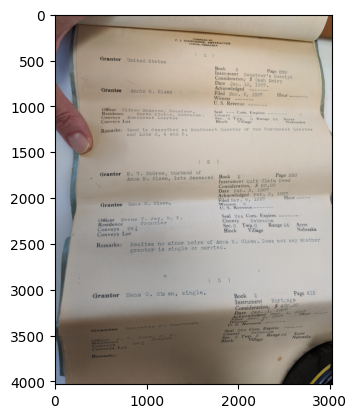

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

aim_util.show_image(source_image_path);

# **AIM Pipeline -> Generate Transforms**

In [11]:
import cv2
import os

def pipeline_xform():

    transformed_images = []

    # read image
    image_source = mpimg.imread(source_image_path)
    transformed_images.append(image_source)

    # generate garyscale & noise reduction transforms
    xform_image_gray = aim_xformer.grayscale(image_source, grayscale_intensity_C)
    transformed_images.append(xform_image_gray)
    xform_prefix = xform_prefix_list[1]
    cv2.imwrite(os.path.join(gdrive_path, source_base + xform_prefix + '.jpg'), xform_image_gray)

    xform_image_noise = aim_xformer.noise_reduction(image_source, noise_kernel_size_A)
    transformed_images.append(xform_image_noise)
    xform_prefix = xform_prefix_list[3]
    cv2.imwrite(os.path.join(gdrive_path, source_base + xform_prefix + '.jpg'), xform_image_noise)



    # Display the images side by side
    for i in range(0, len(transformed_images)):
        plt.subplot(1, len(transformed_images), i + 1)
        plt.title("xform" + str(i))
        plt.imshow(transformed_images[i], cmap='gray')
        plt.axis('off')
    plt.show()

    return image_source, xform_image_gray, xform_image_noise


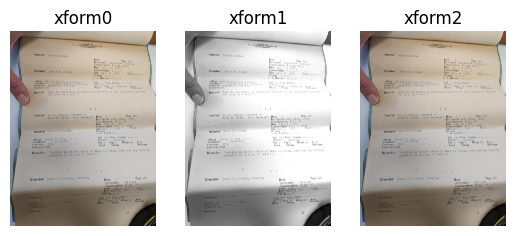

In [12]:
image_source, xform_image_gray, xform_image_noise = pipeline_xform()

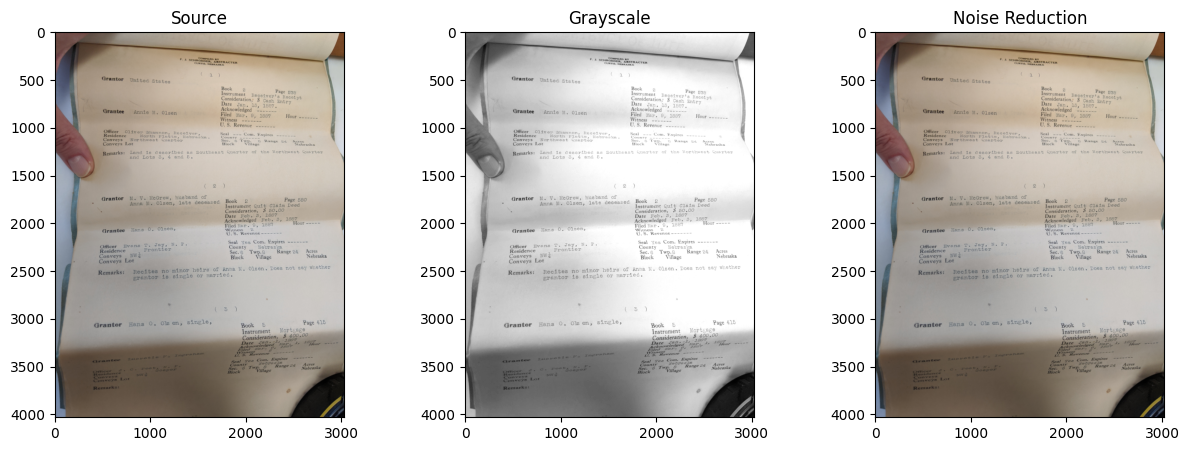

In [13]:
# Display images side-by-side
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # Adjust figsize if needed

axes[0].imshow(image_source, cmap='gray')
axes[0].set_title('Source')

axes[1].imshow(xform_image_gray, cmap='gray')
axes[1].set_title('Grayscale')

axes[2].imshow(xform_image_noise, cmap='gray')
axes[2].set_title('Noise Reduction')

plt.show()



# **AIM Pipeline -> Predict Artifact Text**

In [14]:
# obtain keras OCR pipeine
pipeline_OCR = aim_scanner.get_pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5


In [15]:
#!cat /content/gdrive/MyDrive/AIM/aim_scanner.py

scanning /content/gdrive/MyDrive/AIM/deed_1887_source_orient1.jpg
9/9 [==============================] - 81s 9s/step
ordered_word_list->['schroeder', 'curts', 'neneases', 'anstracter', 'grantor', 'uni', 'ted', 'sta', 'tes', 'book', '2', 'instrument', 'page', '578', 'considera', 'tiong', 's', 'receiver', 'cash', 's', 'entry', 'recei', 'pt', 'date', 'jan', '13', '1887', 'acknowledged', 'grantee', 'annie', 'm', 'olsen', 'filed', 'mar', '9', '1887', 'hour', 'witness', 'u', 's', 'revenue', 'oficer', 'residence', 'oliv', 'er', 'nor', 'th', 'shannon', 'pit', 'te', 'recei', 'nebra', 'ver', 's', 'ka', 'seal', 'county', 'coms', 'expires', 'conveys', 'nor', 'thw', 'es', 't', 'cuar', 'ter', 'sec', 'twplage', 'range', 'za', 'gsees', 'con', 'veys', 'lot', 'block', 'sebraska', 'remarksa', 'land', 'is', 'described', 'es', 'southeast', 'quarter', 'of', 'the', 'nor', 'thwest', 'clua', 'rtes', 'and', 'lots', '36', '4', 'and', '5', 'grantor', 'm', 'v', 'mcgrew', 'hus', 'band', 'of', 'anna', 'm', 'olseng',

([('comred',
   array([[1500.5631 ,  263.05502],
          [1663.165  ,  276.06314],
          [1661.1869 ,  300.78992],
          [1498.585  ,  287.7818 ]], dtype=float32)),
  ('schroeder',
   array([[1398.6008 ,  277.38538],
          [1644.3026 ,  296.6561 ],
          [1641.8652 ,  327.7333 ],
          [1396.1635 ,  308.4626 ]], dtype=float32)),
  ('anstracter',
   array([[1662.3297 ,  295.84872],
          [1911.1431 ,  311.39957],
          [1909.2279 ,  342.0416 ],
          [1660.4146 ,  326.49075]], dtype=float32)),
  ('curts',
   array([[1457.3367 ,  313.39783],
          [1580.5126 ,  323.6625 ],
          [1578.286  ,  350.3832 ],
          [1455.1101 ,  340.11853]], dtype=float32)),
  ('nenesses',
   array([[1594.9862 ,  325.672  ],
          [1769.0238 ,  335.90952],
          [1767.571  ,  360.60715],
          [1593.5334 ,  350.36963]], dtype=float32)),
  ('grantor',
   array([[489.0783 , 462.35754],
          [722.43634, 476.08453],
          [719.70715, 522.4791 ],
 

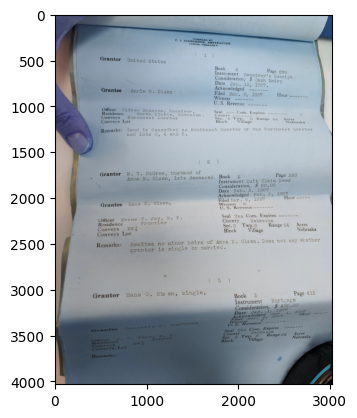

In [16]:
%%time
%%capture
transform_basename_list = ['deed_1887_source_orient1', 'deed_1887_xform1', 'deed_1887_xform3']

aim_scanner.predict(gdrive_path, transform_basename_list, pipeline_OCR, 0);

# **AIM Pipeline -> Rate Prediction Accuracy**
**deed_1887 source image most accurate!**

In [12]:
!pip install fuzzywuzzy
import aim_rater

groundtruth_list => ['sunnyday', 'day', 'breeze', 'tulip', 'light', 'parrot', 'summertime', 'cloud']
prediction list => ['sunny', 'days', 'moonbreeze', 'atulip', 'lighti', 'parnot', 'summmer', 'cloudy']
Groundtruth list length: 8
Prediction list length: 8
Exact match percentage: 0.0% with exact match count 0
Partial match percentage: 62.5% with exact match count 5

Matching words:
[]

Partially Matching words:
['days', 'atulip', 'lighti', 'parnot', 'cloudy']

Mismatched words:
['sunny', 'moonbreeze', 'summmer']


/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [13]:
def rate_xform_set(transform, groundtruth_list, prediction_list, transform_names, exact_match_values, partial_match_values, print_list=True):
    print(f"=========={transform}===========")
    match_count, partial_match_count, exact_match_percentage, partial_match_percentage = aim_rater.rate_match(groundtruth_list, eval(f'pred_{transform}_list'))
    exact_match_values.append(exact_match_percentage)
    partial_match_values.append(partial_match_percentage)
    transform_names.append(transform)

    return transform_names, exact_match_values, partial_match_values

In [14]:
# construct grayscale pred lists
#import ast


pred_xform0_path = '/content/gdrive/MyDrive/AIM/deed_1887_source_orient1_word_list.txt'
pred_xform1_path = '/content/gdrive/MyDrive/AIM/deed_1887_xform1_word_list.txt'
pred_xform3_path = '/content/gdrive/MyDrive/AIM/deed_1887_xform3_word_list.txt'

# def file_to_list(path):
#     with open(path, 'r') as f:
#         target_list = ast.literal_eval(f.read())
#     return target_list

pred_xform0_list = aim_util.file_to_list(pred_xform0_path)
pred_xform1_list = aim_util.file_to_list(pred_xform1_path)
pred_xform3_list = aim_util.file_to_list(pred_xform3_path)


==========xform1===========
groundtruth_list => ['schroeder', 'curts', 'neneases', 'anstracter', 'grantor', 'uni', 'ted', 'sta', 'tes', 'book', '2', 'instrument', 'page', '578', 'considera', 'tiong', 's', 'receiver', 'cash', 's', 'entry', 'recei', 'pt', 'date', 'jan', '13', '1887', 'acknowledged', 'grantee', 'annie', 'm', 'olsen', 'filed', 'mar', '9', '1887', 'hour', 'witness', 'u', 's', 'revenue', 'oficer', 'residence', 'oliv', 'er', 'nor', 'th', 'shannon', 'pit', 'te', 'recei', 'nebra', 'ver', 's', 'ka', 'seal', 'county', 'coms', 'expires', 'conveys', 'nor', 'thw', 'es', 't', 'cuar', 'ter', 'sec', 'twplage', 'range', 'za', 'gsees', 'con', 'veys', 'lot', 'block', 'sebraska', 'remarksa', 'land', 'is', 'described', 'es', 'southeast', 'quarter', 'of', 'the', 'nor', 'thwest', 'clua', 'rtes', 'and', 'lots', '36', '4', 'and', '5', 'grantor', 'm', 'v', 'mcgrew', 'hus', 'band', 'of', 'anna', 'm', 'olseng', 'late', 'deceased', 'book', '2', 'page', '580', 'instrument', 'qui', 't', 'claim', 'dee

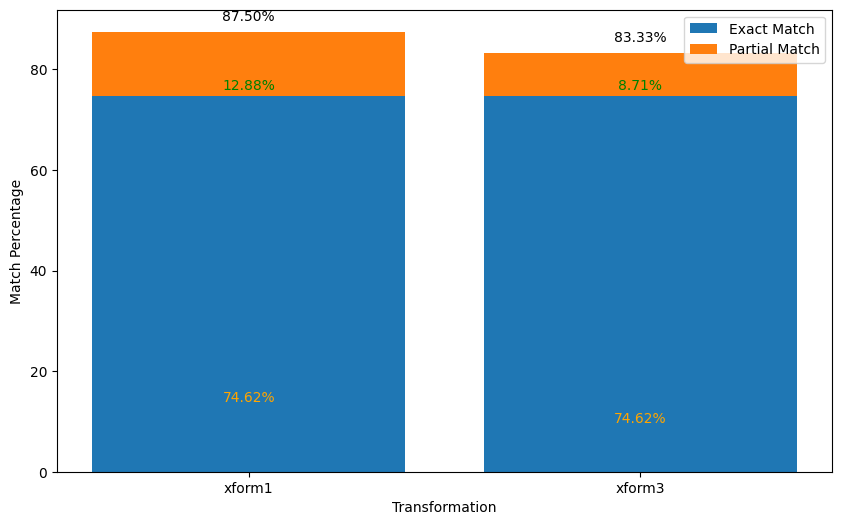

transform->xform1 total percentage->87.5
transform->xform3 total percentage->83.33333333333334

top xform-> xform1 with top percent->87.50


In [16]:
transform_names = []
exact_match_values = []
partial_match_values = []

# transformations = ['xform0', 'xform1', 'xform2', 'xform3', 'xform4', 'xform5']
transform_list = ['xform0', 'xform1', 'xform3']

transform_names, exact_match_values, partial_match_values = rate_xform_set(transform_list[1], pred_xform0_list, pred_xform1_list, transform_names, exact_match_values, partial_match_values)
transform_names, exact_match_values, partial_match_values = rate_xform_set(transform_list[2], pred_xform0_list, pred_xform3_list, transform_names, exact_match_values, partial_match_values)

aim_rater.plot_matchA(transform_names, exact_match_values, partial_match_values)

top_percent = 0
top_xform = ""
for i in range(len(transform_names)):
    total_percent = exact_match_values[i] + partial_match_values[i]
    print(f"transform->{transform_names[i]} total percentage->{total_percent}")

    if total_percent > top_percent:
        top_percent = total_percent
        top_xform = transform_names[i]

total_percent2f = format(top_percent, ".2f")
print(f"\ntop xform-> {top_xform} with top percent->{total_percent2f}")

# **AIM Pipeline -> Overlay Predictions with Bounding Boxes**

In [21]:
# deed_1887 source image
image_path = source_image_path
pred_raw_path = '/content/gdrive/MyDrive/AIM/deed_1887_source_orient1_raw_bbox.pkl'

overlay_image_path_raw = '/content/gdrive/MyDrive/AIM/deed_1887_raw_xform0.jpg'

font_path = '/content/gdrive/MyDrive/AIM/OpenSans-Regular.ttf'

In [22]:
%%capture
# overlay raw preds
preds_path = pred_raw_path
overlay_image_path = overlay_image_path_raw

# overlay_preds(preds_path, overlay_image_path, raw_preds=True, bbox_color=(0, 0, 255), text_color=(0, 255, 0));
aim_overlayer.overlay_preds(image_path, preds_path, overlay_image_path, font_path, raw_preds=True, bbox_color=(0, 0, 255), text_color=(0, 255, 0))

In [23]:
from google.colab import files
files.download(overlay_image_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **AIM Pipeline -> Summarize Results**